<img src="../../figs/holberton_logo.png" alt="logo" width="500"/>

# Image Classification using Cifar-10

## Executive Summary

The CIFAR-10 dataset is a well-established benchmark in the field of machine learning, specifically designed for image classification. Comprising `60,000` color images, each of size `32x32` pixels, the dataset is segmented into `10` distinct classes, each representing a different object or living thing. The classes included the following:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

Each class contains an equal distribution of `6,000` images.

## Project Objectives and Key Steps

This project aims to develop an effective Convolutional Neural Network (CNN) for classifying CIFAR-10 images. We will explore the dataset, normalize pixel values, and use data augmentation to improve model performance. The CNN, built with Keras, will include dropout and regularization to prevent overfitting. Training will incorporate dynamic learning rate adjustments and early stopping. Finally, we will evaluate the model's accuracy on test data and its predictive power on non-CIFAR-10 images for real-world applicability.

### Data Insights and Exploration
- Familiarize with the CIFAR-10 dataset.
- Visually inspect sample images from various classes to understand data distribution.

### Comprehensive Data Preprocessing
- Normalize pixel values of the images to improve model training efficiency.
- Convert image labels into a one-hot encoded format suitable for classification tasks.
- Implement data augmentation techniques to increase the dataset's variability and improve model generalization.

### Deep Learning Architectural Design using Keras
- Design a Convolutional Neural Network (CNN) tailored for the CIFAR-10 dataset using the Keras framework.
- Incorporate mechanisms such as dropouts and regularizations to counteract overfitting.

### Model Training Process and Learning Analysis
- Train the CNN using the prepared dataset.
- Utilize callbacks to adjust the learning rate dynamically and halt the training early if no improvements are detected, restoring the best model weights from the training.
- Visualize the model's learning curves, observing both training and validation performance metrics over epochs.

### Model Evaluation and Real-World Generalization
- Assess the trained model's accuracy and loss on the unseen test data to determine its robustness.
- Evaluate the model's predictive capability using an image not part of the CIFAR-10 dataset to gauge its real-world applicability.

## 1. Import Libraries

In this step, we import necessary libraries and modules required for the project. These include the tensorflow framework, NumPy for numerical operations, Matplotlib for visualization, scikit-learn for data splitting and preprocessing, and Keras for building and training deep learning models. We also import specific components from Keras such as datasets, image preprocessing tools, model layers, optimizers, and callbacks. 

These libraries provide essential functionalities for loading and preprocessing data, building and training convolutional neural networks (CNNs).

In [21]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import load_model

## Data Insights and Exploration

### Load train, test and validation data

- First, let's download the CIFAR-10 dataset from Keras library
- Then, let's split original training data to training and validation sets
- Next, we print out the dimensions of our training, validation, and test datasets

In [22]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [24]:
print('Train Images Shape:\t\t', X_train.shape)
print('Train Labels Shape:\t\t', y_train.shape)

print('\nValidation Images Shape:\t', X_valid.shape)
print('Validation Labels Shape:\t', y_valid.shape)

print('\nTest Images Shape:\t\t', X_test.shape)
print('Test Labels Shape:\t\t', y_test.shape)

Train Images Shape:		 (45000, 32, 32, 3)
Train Labels Shape:		 (45000, 1)

Validation Images Shape:	 (5000, 32, 32, 3)
Validation Labels Shape:	 (5000, 1)

Test Images Shape:		 (10000, 32, 32, 3)
Test Labels Shape:		 (10000, 1)


### Explore a Subset of Training Data

In this step, we visually explore a sample of images from the CIFAR-10 dataset. We display the first 24 images along with their corresponding class labels, providing a quick overview of the dataset's contents and class distribution. This visualization aids in understanding the variety of images and categories present in the dataset.

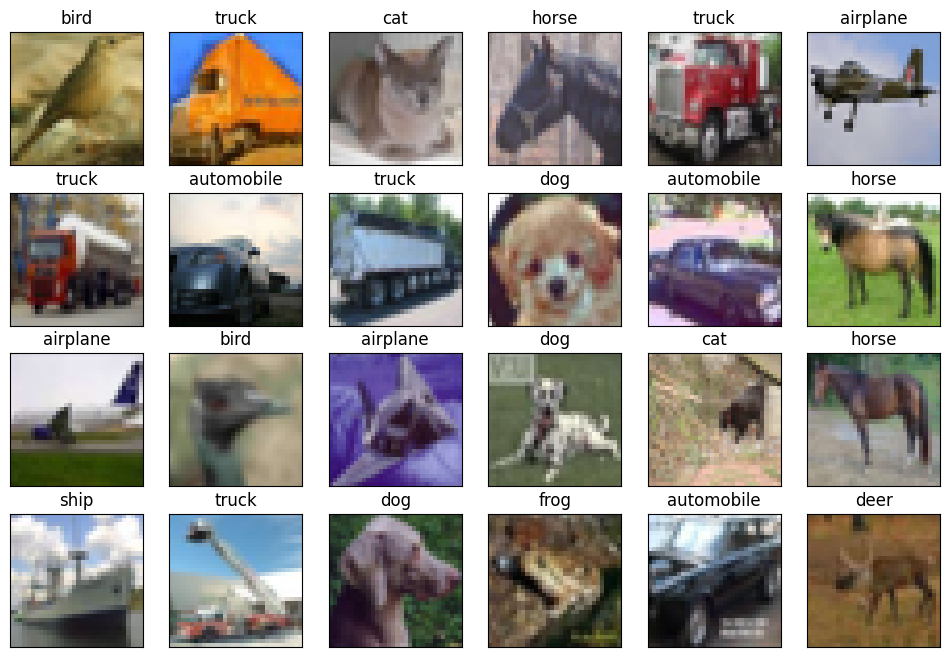

In [25]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(12,8))

# Loop over the first 24 images
for i in range(24):
    # Create a subplot for each image
    plt.subplot(4, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(X_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

## 3. Data Preprocessing

In this phase, we undertake essential preparatory measures to ensure our dataset is aptly primed for the modeling process:

- Normalization of Image Data

- One-Hot Encoding of Labels

- Data Augmentation

### 3.1 Normalization of Image Data

Normalization ensures that the feature values are scaled to a similar range, which can improve the performance and convergence of the neural network model during training.


To achieve that, we use the `tf.keras.utils.normalize` function. Normalization is performed along the specified axis (`axis=1`), which typically corresponds to the feature axis. 

In [26]:
# Convert pixel values data type to float32
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

# Calculate the mean and standard deviation of the training images
mean = np.mean(X_train)
std  = np.std(X_train)

# Normalize the data
# The tiny value 1e-7 is added to prevent division by zero
X_train = (X_train-mean)/(std+1e-7)
X_test  = (X_test-mean) /(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)

### 3.2 One-Hot Encoding of Labels

One-hot encoding is a technique used in classification tasks to represent categorical data as binary vectors, where each class is represented by a binary value. This transformation allows the neural network model to better understand and process the categorical labels during training and evaluation.

This step involves converting the categorical labels into one-hot encoded vectors using the `to_categorical` function from Keras

In [27]:
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test  = to_categorical(y_test, 10)

### 3.3 Data Augmentation

Next, we incorporate data augmentation to artificially expand the training set size by generating modified versions of images within the dataset. This approach is crucial for improving the model's generalization ability, thereby minimizing overfitting. Techniques like rotations, shifts, flips, shearing, and intensity changes introduce subtle variations to existing images, thereby diversifying the training samples.

####  Rotation 

A small degree of rotation can help the model become invariant to the orientation of the object. The `rotation_range=15` means the image could be rotated randomly within `-15` to `15` degrees. However, large rotations could be harmful since the CIFAR-10 images are relatively small and a big rotation might put the object outside of the image.

#### Width and Height shift

Small shifts can help the model become invariant to the position of the object in the image. Here, `width_shift_range=0.12` and `height_shift_range=0.12` mean the image could be moved horizontally or vertically by up to `12%` of its width or height respectively. Again, since the images are small, large shifts might put the object outside of the image.


####  Horizontal Flip

A horizontal flip is a sensible choice for this dataset because for many images, the object of interest remains the same when flipped horizontally (for example, a flipped car is still a car).


####  Zoom

Small zooming in by up to `10%` (`zoom_range=0.1`) can also help the model generalize better. However, excessive zooming might lead to significant information loss.


####  Brightness Range

Changing brightness can simulate various lighting conditions. With `brightness_range=[0.9,1.1]`, the brightness of the image is randomly changed to a value between `90%` and `110%` of the original brightness.


####  Shear Intensity

With `shear_range=10`, a shear intensity within the range of `-10` to `+10` degrees is applied. This transformation changes the shape of the image, helping the model to recognize objects in different perspectives.


#### Channel Shift Intensity 

With `channel_shift_range=0.1`, the intensities of the RGB channels are randomly shifted by up to `10%` of their full scale. This can help the model handle different lighting conditions and color variations.

The chosen techniques are expected to help improve the robustness and generalization capability of the model. Note that when running the below code, we are setting up a pipeline for preprocessing the images during model training. The generator applies a series of random transformations (specified by the parameters) to the images each time they are loaded into the model for training. Each time an epoch is run during model training, these random transformations will create different variations of the original images. These changes are made on-the-fly and don't modify our original dataset.

In [28]:
# Data augmentation
# write your code here

data_generator = ImageDataGenerator(
    # Rotate images randomly by up to 15 degrees
    rotation_range=15,
    # Shift images horizontally by up to 12% of their width
    width_shift_range=0.12,
    # Shift images vertically by up to 12% of their height
    height_shift_range=0.12,
    # Randomly flip images horizontally
    horizontal_flip=True,
    # Zoom images in by up to 10%
    zoom_range=0.1,
    # Change brightness by up to 10%
    brightness_range=[0.9, 1.1],
    # Shear intensity (shear angle in counter-clockwise direction in degrees)
    shear_range=10,
    # Channel shift intensity
    channel_shift_range=0.1,
)

## 4.  Define CNN Model Architecture

The model architecture is inspired from the VGG16 network. It contains multiple convolutional layers followed by max-pooling and dropout layers, and finally a fully connected layer for classification. While not adopting advanced modules like residuals or inceptions, this design is simpler, ensuring fewer parameters and a more straightforward architecture, making it more computationally efficient.


<img src="../img/vgg.webp" alt="logo" width="800"/>


#### Initial Convolution and Pooling Layers with Regularization

- The network begins with a pair of `Conv2D` layers, each with `32` filters of size `3x3`. 
- This is followed by a Batch Normalization layer which accelerates training and provides some level of regularization, helping to prevent overfitting.
- The pairs of `Conv2D` layers are followed by a `MaxPooling2D` layer, which reduces the spatial dimensions (height and width), effectively providing a form of translation invariance and reducing computational complexity. 
- This is followed by a `Dropout` layer that randomly sets a fraction (`0.2` for the first dropout layer) of the input units to 0 at each update during training, helping to prevent overfitting.

#### Progressive Feature Learning

- This pattern of two `Conv2D` layers, followed by a `Batch Normalization` layer, a `MaxPooling2D` layer, and a `Dropout` layer, repeats three more times. 
- The number of filters in the `Conv2D` layers doubles with each repetition, starting from `32` and going up to `64`, `128`, and then `256`. 
- This increasing pattern helps the network to learn more complex features at each level. The dropout rate also increases at each step, from `0.2` to `0.5`.


#### Transition to Classification Layer
- After the convolutional and pooling layers, a `Flatten` layer is used to convert the `2D` outputs of the preceding layer into a 1D vector.
- Finally, a `Dense` (or fully connected) layer is used for classification. It has `10` units, each representing one of the `10` classes of the CIFAR-10 dataset, and a softmax activation function is used to convert the outputs to probability scores for each class.


This architecture leverages the strengths of deep CNNs to learn hierarchical features from the CIFAR-10 images. Regularization techniques such as L2 regularization, Dropout, and Batch Normalization are also used to combat overfitting. While being inspired by VGG16, the model remains simpler and does not incorporate the more advanced features of recent architectures, focusing instead on efficiency and simplicity.

### Architecture in Detail

**Hyperparameters**: use `weight_decay = 0.0001`


#### First Convolutional Block

- `Conv2D` layer with `32` filters, kernel size `(3, 3)`, `'same'` padding, `ReLU` activation, `L2` regularization (weight decay `0.0001`), and input shape `(32, 32, 3)`.
- `BatchNormalization` layer.
- `Conv2D` layer with `32` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `MaxPooling2D` layer with pool size `(2, 2)`.
- `Dropout` layer with a rate of `0.2`.

#### Second Convolutional Block

- `Conv2D` layer with `64` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `Conv2D` layer with `64` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `MaxPooling2D` layer with pool size `(2, 2)`.
- `Dropout` layer with a rate of `0.3`.

#### Third Convolutional Block

- `Conv2D` layer with `128` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `Conv2D` layer with `128` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `MaxPooling2D` layer with pool size `(2, 2)`.
- `Dropout` layer with a rate of `0.4`.

#### Fourth Convolutional Block
- `Conv2D` layer with `256` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `Conv2D` layer with `256` filters, kernel size `(3, 3)`, '`same`' padding, `ReLU` activation, and `L2` regularization.
- `BatchNormalization` layer.
- `MaxPooling2D` layer with pool size `(2, 2)`.
- `Dropout` layer with a rate of `0.5`.

#### Fully Connected Layers
- `Flatten` layer to convert the `2D` outputs to a `1D` vector.
- `Dense` layer with `10` units and `softmax` activation for classification.

In [31]:
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import keras

# For fitting the model later
early_stopping = EarlyStopping(patience=5, verbose=1, monitor="val_loss", restore_best_weights=True)
init = keras.initializers.HeNormal()


# making the model using 3 layers of convolution and pooling and 2 dense
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  padding='same', input_shape=(128, 128, 3),
                  kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),
    
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),
    
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),
    
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same',
                  kernel_initializer=init
                  ),
    layers.BatchNormalization(),
    layers.Conv2D(512, kernel_size=(3, 3), activation='relu',
                  padding='same', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    layers.Dropout(0.2),
    
    layers.Flatten(),
    
    layers.Dense(256, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(128, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(64, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(32, activation='relu', kernel_initializer=init),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    
    layers.Dense(10, activation='softmax', kernel_initializer=init)
])

model.summary(
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_15            │ (None, 64, 64, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_16            │ (None, 32, 32, 64)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_46          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_17            │ (None, 16, 16, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_48          │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 16, 16, 256)    │       590,08

 Total params: 6,863,050 (26.18 MB)

 Trainable params: 6,858,122 (26.16 MB)

 Non-trainable params: 4,928 (19.25 KB)

## 5. Training the CNN Model

Once the architecure is defined, we can start training our neural network model. We will utilize a batch size of `64` and setting a maximum of `50` epochs, or until the early stopping condition triggers. Throughout the training, the model's performance undergoes evaluation on the validation data after each epoch. To augment the training process, we've integrated two callback functions:

####  Learning Rate Adjustment with `ReduceLROnPlateau` Callback

The `ReduceLROnPlateau` callback dynamically adjusts the learning rate by halving it (`factor=0.5`) whenever the validation loss stagnates for `5` consecutive epochs. This adaptive learning rate modification aims to guide the model towards the global minimum of the loss function, enhancing training convergence.

#### Training Control with EarlyStopping Callback

The `EarlyStopping` callback monitors the validation loss, halting the training process if no improvement is observed over a predefined number of epochs. This prevents unnecessary resource expenditure and time consumption. Additionally, this callback restores the model's best weights obtained during training, ensuring optimal configuration.

#### Model Training with Augmented Data and Callbacks

The `model.fit` function trains the neural network model using a data generator to generate batches of augmented data during training. It specifies the number of epochs for training and the validation data to evaluate the model's performance. Additionally, it utilizes the `reduce_lr` and `early_stopping` callbacks to dynamically adjust the learning rate and halt training if no improvement is observed, respectively. 





In [30]:
import keras
# FOR EACH OF THE COMMENTS BELOW WRITE THE NECESSARY CODE


# Set the batch size for the training to 64 (hyperparameter)
batch_size = 64
# Set the maximum number of epochs for the training to 150 (hyperparameter)
epochs = 100
# Define the optimizer (Adam) with learning rate 0.0005
adam = keras.optimizers.Adam(learning_rate=0.0005)
# Compile the model with the defined optimizer, loss function, and metrics
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# Add ReduceLROnPlateau callback
# Here, the learning rate will be reduced by half (factor=0.5) if no improvement in validation loss is observed for 10 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)


# The `restore_best_weights` parameter ensures that the model weights are reset to the values from the epoch
# with the best value of the monitored quantity (in this case, 'val_loss').

# Fit the model on the training data, using the defined batch size and number of epochs
# The validation data is used to evaluate the model's performance during training
# The callbacks implemented are learning rate reduction when a plateau is reached in validation loss and
# stopping training early if no improvement is observed
model.fit(
    data_generator.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_valid, y_valid),
    epochs=epochs,
    callbacks=[reduce_lr, early_stopping],
)


Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_9" is incompatible with the layer: expected axis -1 of input shape to have value 8192, but received input with shape (None, 512)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 32, 32, 3), dtype=float32)
  • training=True
  • mask=None

## 6. Visualize Learning Progress

After training the model, we visualize the progression of training and validation loss, as well as accuracy, across epochs using the model's history. The objective is to provide insights into how these metrics evolve during the training process. 


Based on the visualizations above, it's evident that the model is performing well without signs of overfitting. This conclusion is supported by the close alignment of training and validation accuracy and loss values throughout the training process. The gap between training and validation accuracy remains minimal, indicating that the model generalizes well to unseen data. Similarly, the model's loss on validation data closely follows the training loss, reinforcing the assertion of good generalization. Therefore, the model appears to be well regularized and not overfitting to the training data.

In [ ]:
# 

## 7. Evaluating Model on Test Data

The goal is to use the trained model to make predictions on the test data and evaluate its performance by calculating the test loss and accuracy.

🎯 With a test accuracy of `90%`, our model demonstrates good performance on unseen data. This high accuracy, achieved using a relatively compact model of just about 1.2 million parameters, is noteworthy. Many advanced architectures employ tens or even hundreds of millions of parameters to achieve slightly better results. 

The proximity of the test loss and accuracy to their respective training counterparts signifies that our model is not merely memorizing the training data but is genuinely understanding patterns and effectively generalizing from the training data to unseen data. Thus, it can be inferred that our model not only delivers reliable predictions but also strikes a balance between efficiency and performance.

In [ ]:
# Use the model to make predictions, evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

print('\nTest Accuracy:', test_acc)
print('Test Loss:    ', test_loss)

## Performance on an Out-of-Dataset Image

To further explore the generalization capability of our trained CIFAR-10 classification model, we will assess its performance using few external images. These images, which are not part of the CIFAR-10 dataset provide an opportunity to see how our model behaves with real-world, out-of-dataset samples:

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("../img/automobile.jpg")

# Convert the image from BGR to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()


In [ ]:
# Resize the image to 32x32 pixels
image = cv2.resize(image, (32, 32))

# Normalize the image
image = (image - mean) / (std + 1e-7)

# Add an extra dimension for the batch
image = np.expand_dims(image, axis=0)

# Make predictions
prediction = model.predict(image)

# Get the predicted class index
predicted_class_index = np.argmax(prediction)

# Get the class name corresponding to the predicted index
predicted_class_name = class_names[predicted_class_index]

print('Predicted class: ', predicted_class_name)

### Happy Coding